In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
target_column = "target"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)

In [6]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=0)

In [8]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (768, 13)
y_train: (768,)
X_test: (257, 13)
y_test: (257,)


In [9]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(13,)))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [11]:
basic_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5147 - loss: 0.7122
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6181 - loss: 0.6547
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7184 - loss: 0.6185
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7326 - loss: 0.5857
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7536 - loss: 0.5569
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7644 - loss: 0.5273
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7523 - loss: 0.5303
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.5014 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7799 - loss: 0.4858 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - loss: 0.4770 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7875 - loss: 0.4647 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accur

In [12]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8805 - loss: 0.2904  
[0.2926647663116455, 0.8910505771636963]
Loss =  0.2926647663116455
Accuracy =  0.8910505771636963


In [13]:
predicted = basic_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


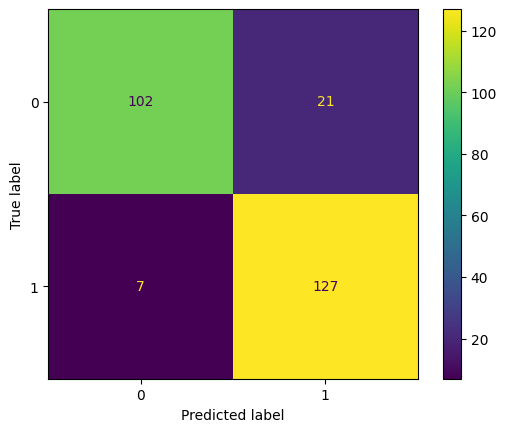

In [14]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()